Number of O-O pairs: 4032


FileNotFoundError: [Errno 2] No such file or directory: '../Figures/Proton/gr_oxygen_oxygen_water.png'

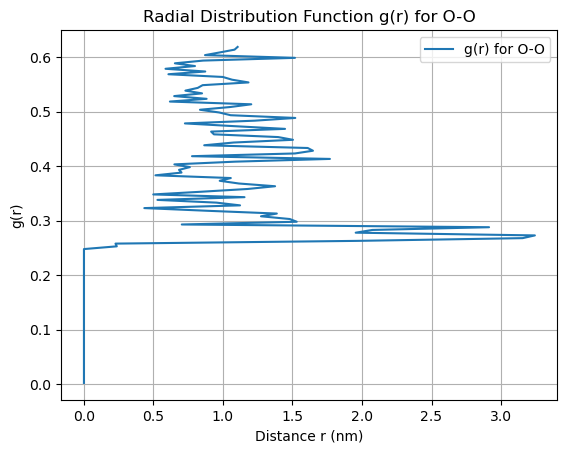

In [6]:
import mdtraj as md
import matplotlib.pyplot as plt

def compute_pair_gr(traj_file, top_file, atom1, atom2, box_size, output_file):
    """
    Compute and visualize the radial distribution function (g(r)) for a specific pair of atoms.

    Parameters:
    - traj_file: str - Path to the trajectory file (.pdb)
    - top_file: str - Path to the topology file (.pdb)
    - atom1: str - Type of the first atom (e.g., "O", "H")
    - atom2: str - Type of the second atom (e.g., "H", "H")
    - box_size: float - Box size in nanometers (nm)
    - output_file: str - Path to save the resulting graph (.png)
    """
    # Load trajectory data
    traj = md.load(traj_file, top=top_file)

    # Select atoms of the specified types
    indices1 = [atom.index for atom in traj.topology.atoms if atom.element.symbol == atom1]
    indices2 = [atom.index for atom in traj.topology.atoms if atom.element.symbol == atom2]

    # Create atom pairs
    pairs = [(i, j) for i in indices1 for j in indices2 if i != j]
    print(f"Number of {atom1}-{atom2} pairs: {len(pairs)}")

    # Compute g(r)
    rdf, edges = md.compute_rdf(traj, pairs=pairs, r_range=(0, box_size / 2))
    r = edges[:len(rdf)]  # Compute r values corresponding to the RDF

    # Plot the graph
    plt.figure()
    plt.plot(r, rdf, label=f"g(r) for {atom1}-{atom2}")
    plt.xlabel("Distance r (nm)")
    plt.ylabel("g(r)")
    plt.title(f"Radial Distribution Function g(r) for {atom1}-{atom2}")
    plt.legend()
    plt.grid()
    plt.savefig(output_file)
    plt.show()

# Box size in nanometers
box_size = 1.242

# Compute and visualize g(r) for Oxygen-Oxygen pairs
compute_pair_gr(
    traj_file="/home/ndv3235/comp-lab-class-2024/Week12-IntroAIMD/Run_Proton/proton.pdb",
    top_file="/home/ndv3235/comp-lab-class-2024/Week12-IntroAIMD/Run_Proton/proton.pdb",
    atom1="O",
    atom2="O",
    box_size=box_size,
    output_file="../Figures/Proton/gr_oxygen_oxygen_water.png"
)

# Compute and visualize g(r) for Oxygen-Hydrogen pairs
compute_pair_gr(
    traj_file="/home/ndv3235/comp-lab-class-2024/Week12-IntroAIMD/Run_Proton/proton.pdb",
    top_file="/home/ndv3235/comp-lab-class-2024/Week12-IntroAIMD/Run_Proton/proton.pdb",
    atom1="O",
    atom2="H",
    box_size=box_size,
    output_file="../Figures/Proton/gr_oxygen_hydrogen_proton.png"
)
